In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_train = pd.read_csv("flight_train.csv",parse_dates=["Date_of_Journey"])
df_test = pd.read_csv("flight_test.csv",parse_dates=["Date_of_Journey"])
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,2019-06-24,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [5]:
df_train.shape

(10683, 11)

In [6]:
df_test.shape

(2671, 10)

In [7]:
df_train["training"] = 1
df_test["training"] = 0

In [8]:
df = pd.concat([df_train,df_test])
df.shape

(13354, 12)

In [9]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,training
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,1
1,Air India,2019-01-05,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,1
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,1
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1


In [10]:
df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
training              0
dtype: int64

In [11]:
df.duplicated().sum()

246

In [12]:
df= df.drop_duplicates()

In [13]:
df.duplicated().sum()

0

In [14]:
df.isna().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2645
training              0
dtype: int64

In [15]:
df.shape

(13108, 12)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13108 entries, 0 to 2670
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          13108 non-null  object        
 1   Date_of_Journey  13108 non-null  datetime64[ns]
 2   Source           13108 non-null  object        
 3   Destination      13108 non-null  object        
 4   Route            13107 non-null  object        
 5   Dep_Time         13108 non-null  object        
 6   Arrival_Time     13108 non-null  object        
 7   Duration         13108 non-null  object        
 8   Total_Stops      13107 non-null  object        
 9   Additional_Info  13108 non-null  object        
 10  Price            10463 non-null  float64       
 11  training         13108 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 1.3+ MB


In [17]:
df_train['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

Text(0.5, 1.0, 'Number of Cases wrt Airline')

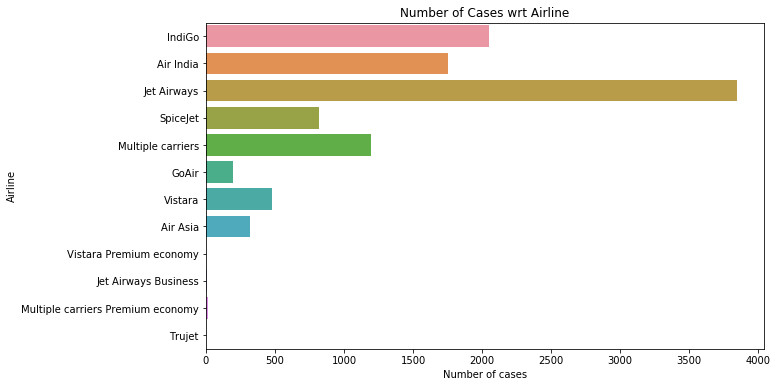

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(y=df_train["Airline"])
plt.xlabel('Number of cases')
plt.title('Number of Cases wrt Airline')

In [19]:
df['year'] = pd.DatetimeIndex(df['Date_of_Journey']).year
df['month'] = pd.DatetimeIndex(df['Date_of_Journey']).month
df['day'] = pd.DatetimeIndex(df['Date_of_Journey']).day
df['weekday'] = pd.DatetimeIndex(df['Date_of_Journey']).weekday
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,training,year,month,day,weekday
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,1,2019,3,24,6
1,Air India,2019-01-05,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,2019,1,5,5
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,1,2019,9,6,4
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,1,2019,12,5,3
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,2019,1,3,3


In [20]:
#dropping data not required
df.drop("Date_of_Journey",axis=1,inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13108 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13108 non-null  object 
 1   Source           13108 non-null  object 
 2   Destination      13108 non-null  object 
 3   Route            13107 non-null  object 
 4   Dep_Time         13108 non-null  object 
 5   Arrival_Time     13108 non-null  object 
 6   Duration         13108 non-null  object 
 7   Total_Stops      13107 non-null  object 
 8   Additional_Info  13108 non-null  object 
 9   Price            10463 non-null  float64
 10  training         13108 non-null  int64  
 11  year             13108 non-null  int64  
 12  month            13108 non-null  int64  
 13  day              13108 non-null  int64  
 14  weekday          13108 non-null  int64  
dtypes: float64(1), int64(5), object(9)
memory usage: 1.6+ MB


In [22]:
df["year"].nunique()

1

In [23]:
df["year"].value_counts()

2019    13108
Name: year, dtype: int64

In [24]:
df.drop("year",axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13108 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13108 non-null  object 
 1   Source           13108 non-null  object 
 2   Destination      13108 non-null  object 
 3   Route            13107 non-null  object 
 4   Dep_Time         13108 non-null  object 
 5   Arrival_Time     13108 non-null  object 
 6   Duration         13108 non-null  object 
 7   Total_Stops      13107 non-null  object 
 8   Additional_Info  13108 non-null  object 
 9   Price            10463 non-null  float64
 10  training         13108 non-null  int64  
 11  month            13108 non-null  int64  
 12  day              13108 non-null  int64  
 13  weekday          13108 non-null  int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 1.5+ MB


In [25]:
df_train = df[df["training"]==1]

In [26]:
#flight_train

Text(0.5, 1.0, 'Number of Cases wrt month')

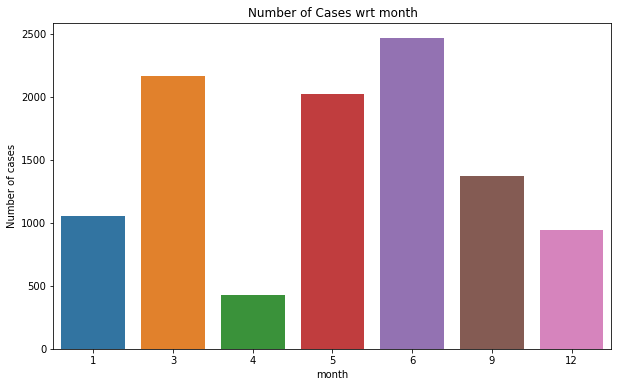

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(df_train["month"])
plt.ylabel('Number of cases')
plt.title('Number of Cases wrt month')

Text(0.5, 1.0, 'Number of Cases wrt day')

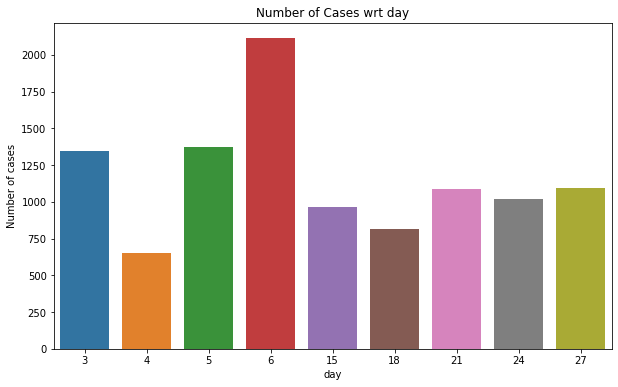

In [28]:
plt.figure(figsize=(10,6))
sns.countplot(df_train["day"])
plt.ylabel('Number of cases')
plt.title('Number of Cases wrt day')

Text(0.5, 1.0, 'Number of Cases wrt weekday')

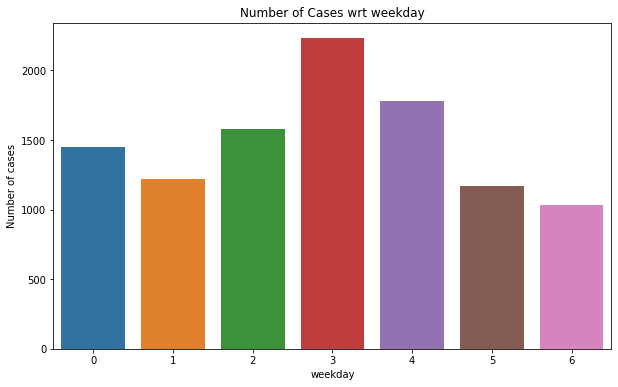

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(df_train["weekday"])
plt.ylabel('Number of cases')
plt.title('Number of Cases wrt weekday')

Text(0.5, 1.0, 'Number of Cases wrt Source')

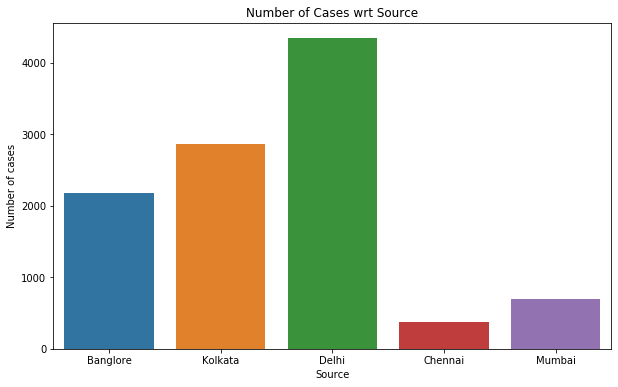

In [30]:
plt.figure(figsize=(10,6))
sns.countplot(df_train["Source"])
plt.ylabel('Number of cases')
plt.title('Number of Cases wrt Source')

Text(0.5, 1.0, 'Number of Cases wrt Destination')

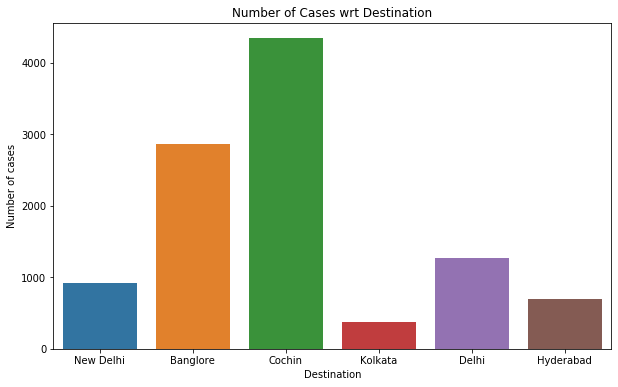

In [31]:
plt.figure(figsize=(10,6))
sns.countplot(df_train["Destination"])
plt.ylabel('Number of cases')
plt.title('Number of Cases wrt Destination')

In [32]:
df["Route"].nunique()

132

In [33]:
df["Route"].value_counts()

DEL ? BOM ? COK                2996
BLR ? DEL                      1922
CCU ? BOM ? BLR                1232
CCU ? BLR                       896
BOM ? HYD                       785
                               ... 
CCU ? IXZ ? MAA ? BLR             1
BOM ? RPR ? VTZ ? HYD             1
BLR ? HBX ? BOM ? AMD ? DEL       1
CCU ? IXB ? DEL ? BLR             1
BOM ? NDC ? HYD                   1
Name: Route, Length: 132, dtype: int64

In [34]:
df["Dep_Time"].nunique()

223

In [35]:
df["Dep_Time"].value_counts()

18:55    287
17:00    275
10:00    257
07:10    238
07:05    237
        ... 
21:40      1
22:25      1
16:25      1
03:00      1
12:45      1
Name: Dep_Time, Length: 223, dtype: int64

In [36]:
df['Dep_Hour'] = pd.to_datetime(df['Dep_Time'], format='%H:%M').dt.hour
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,training,month,day,weekday,Dep_Hour
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,1,3,24,6,22
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,1,5,5,5
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,1,9,6,4,9
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,1,12,5,3,18
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,1,3,3,16


In [37]:
df_train = df[df["training"]==1]

Text(0.5, 1.0, 'Number of Cases wrt Departure Hour')

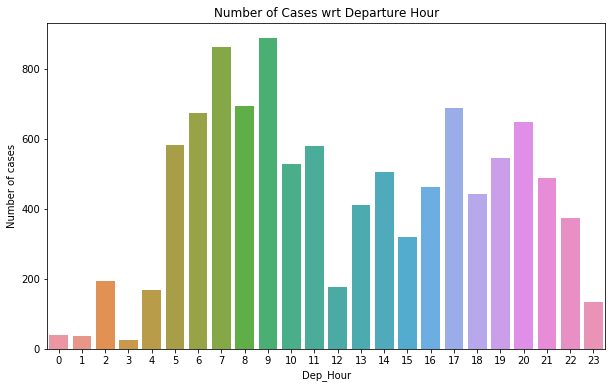

In [38]:
plt.figure(figsize=(10,6))
sns.countplot(df_train["Dep_Hour"])
plt.ylabel('Number of cases')
plt.title('Number of Cases wrt Departure Hour')

In [39]:
df.drop("Dep_Time",axis=1,inplace=True)

In [40]:
df["Arrival_Time"].nunique()

1451

In [41]:
df["Arrival_Time"].value_counts()

19:00           524
21:00           465
19:15           432
16:10           185
12:35           159
               ... 
00:15 16 Apr      1
00:50 10 Apr      1
01:20 28 Apr      1
02:15 13 May      1
01:00 22 Jun      1
Name: Arrival_Time, Length: 1451, dtype: int64

In [42]:
df.drop("Arrival_Time",axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13108 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13108 non-null  object 
 1   Source           13108 non-null  object 
 2   Destination      13108 non-null  object 
 3   Route            13107 non-null  object 
 4   Duration         13108 non-null  object 
 5   Total_Stops      13107 non-null  object 
 6   Additional_Info  13108 non-null  object 
 7   Price            10463 non-null  float64
 8   training         13108 non-null  int64  
 9   month            13108 non-null  int64  
 10  day              13108 non-null  int64  
 11  weekday          13108 non-null  int64  
 12  Dep_Hour         13108 non-null  int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 1.4+ MB


In [43]:
df["Duration"].nunique()

374

In [44]:
df["Duration"].value_counts()

2h 50m     665
1h 30m     493
2h 45m     430
2h 55m     411
2h 35m     399
          ... 
29h 30m      1
31h 10m      1
30h 10m      1
40h 20m      1
42h 5m       1
Name: Duration, Length: 374, dtype: int64

In [45]:
df[['Duration_hours','Duration minutes']] = df.Duration.str.split("h",expand=True,)
df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,training,month,day,weekday,Dep_Hour,Duration_hours,Duration minutes
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897.0,1,3,24,6,22,2,50m
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662.0,1,1,5,5,5,7,25m
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,2 stops,No info,13882.0,1,9,6,4,9,19,
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,No info,6218.0,1,12,5,3,18,5,25m
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1 stop,No info,13302.0,1,1,3,3,16,4,45m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU ? DEL ? BLR,23h 55m,1 stop,No info,NaN,0,6,6,3,20,23,55m
2667,IndiGo,Kolkata,Banglore,CCU ? BLR,2h 35m,non-stop,No info,NaN,0,3,27,2,14,2,35m
2668,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,6h 35m,1 stop,No info,NaN,0,6,3,0,21,6,35m
2669,Air India,Delhi,Cochin,DEL ? BOM ? COK,15h 15m,1 stop,No info,NaN,0,6,3,0,4,15,15m


In [46]:
df.drop("Duration",axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13108 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           13108 non-null  object 
 1   Source            13108 non-null  object 
 2   Destination       13108 non-null  object 
 3   Route             13107 non-null  object 
 4   Total_Stops       13107 non-null  object 
 5   Additional_Info   13108 non-null  object 
 6   Price             10463 non-null  float64
 7   training          13108 non-null  int64  
 8   month             13108 non-null  int64  
 9   day               13108 non-null  int64  
 10  weekday           13108 non-null  int64  
 11  Dep_Hour          13108 non-null  int64  
 12  Duration_hours    13108 non-null  object 
 13  Duration minutes  13106 non-null  object 
dtypes: float64(1), int64(5), object(8)
memory usage: 1.5+ MB


In [47]:
df["Duration minutes"].nunique()

12

In [48]:
df.drop("Duration minutes",axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13108 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13108 non-null  object 
 1   Source           13108 non-null  object 
 2   Destination      13108 non-null  object 
 3   Route            13107 non-null  object 
 4   Total_Stops      13107 non-null  object 
 5   Additional_Info  13108 non-null  object 
 6   Price            10463 non-null  float64
 7   training         13108 non-null  int64  
 8   month            13108 non-null  int64  
 9   day              13108 non-null  int64  
 10  weekday          13108 non-null  int64  
 11  Dep_Hour         13108 non-null  int64  
 12  Duration_hours   13108 non-null  object 
dtypes: float64(1), int64(5), object(7)
memory usage: 1.4+ MB


In [49]:
df["Duration_hours"].nunique()

44

In [50]:
df["Duration_hours"].value_counts()

2     2949
1      785
3      626
5      608
7      600
9      551
12     534
8      531
13     488
11     464
10     459
6      442
14     424
15     333
23     306
16     285
4      278
26     264
24     238
22     231
25     228
27     217
21     210
20     202
18     166
17     160
19     158
28     115
29      61
30      59
38      38
37      22
33      18
32      12
35      10
36       9
34       8
31       8
42       2
47       2
5m       2
39       2
40       2
41       1
Name: Duration_hours, dtype: int64

In [51]:
df["Duration_hours"].replace('5m', np.NaN,inplace=True)

In [52]:
df["Duration_hours"].nunique()

43

In [53]:
df.Duration_hours = df.Duration_hours.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13108 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13108 non-null  object 
 1   Source           13108 non-null  object 
 2   Destination      13108 non-null  object 
 3   Route            13107 non-null  object 
 4   Total_Stops      13107 non-null  object 
 5   Additional_Info  13108 non-null  object 
 6   Price            10463 non-null  float64
 7   training         13108 non-null  int64  
 8   month            13108 non-null  int64  
 9   day              13108 non-null  int64  
 10  weekday          13108 non-null  int64  
 11  Dep_Hour         13108 non-null  int64  
 12  Duration_hours   13106 non-null  float64
dtypes: float64(2), int64(5), object(6)
memory usage: 1.4+ MB


In [54]:
df_train = df[df["training"]==1]

Text(0.5, 1.0, 'Number of Cases wrt Duration in Hours')

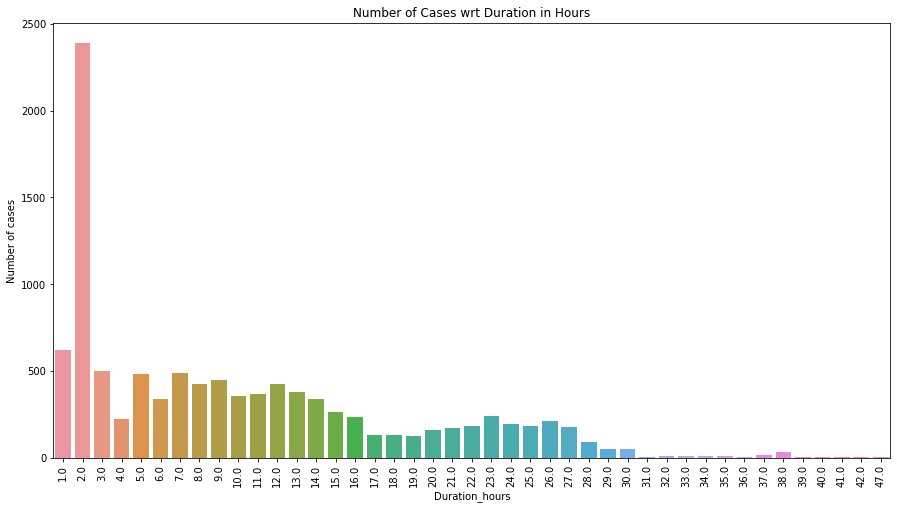

In [55]:
plt.figure(figsize=(15,8))
sns.countplot(df_train["Duration_hours"])
plt.ylabel('Number of cases')
plt.xticks(rotation=90)
plt.title('Number of Cases wrt Duration in Hours')

In [56]:
df["Total_Stops"].nunique()

5

In [57]:
df["Total_Stops"].value_counts()

1 stop      7052
non-stop    4321
2 stops     1678
3 stops       54
4 stops        2
Name: Total_Stops, dtype: int64

In [58]:
df["Total_Stops"] = df["Total_Stops"].replace({"1 stop":1,"non-stop":0,"2 stops":2,"3 stops":3,"4 stops":4})

In [59]:
df["Total_Stops"].value_counts()

1.0    7052
0.0    4321
2.0    1678
3.0      54
4.0       2
Name: Total_Stops, dtype: int64

In [60]:
df_train = df[df["training"]==1]

Text(0.5, 1.0, 'Number of Cases wrt Total Number of Stops')

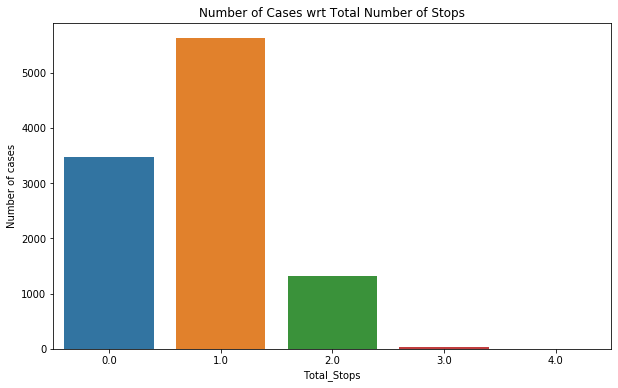

In [61]:
plt.figure(figsize=(10,6))
sns.countplot(df_train["Total_Stops"])
plt.ylabel('Number of cases')
plt.title('Number of Cases wrt Total Number of Stops')

In [62]:
df["Additional_Info"].nunique()

10

In [63]:
df["Additional_Info"].value_counts()

No info                         10309
In-flight meal not included      2366
No check-in baggage included      394
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
1 Short layover                     1
Red-eye flight                      1
2 Long layover                      1
Name: Additional_Info, dtype: int64

In [64]:
df_train = df[df["training"]==1]

Text(0.5, 1.0, 'Ticket Price-Distplot')

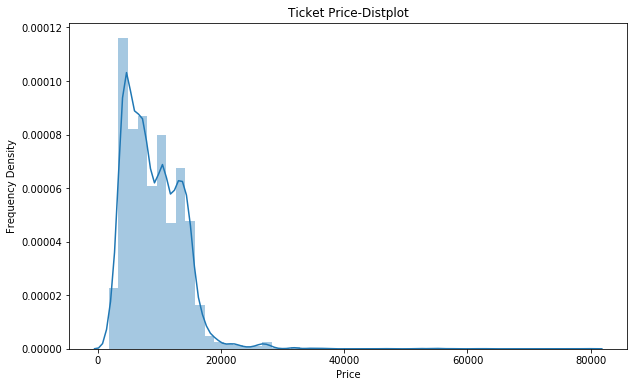

In [65]:
plt.figure(figsize=(10,6))
sns.distplot(df_train["Price"])
plt.xlabel('Price')
plt.ylabel('Frequency Density')
plt.title('Ticket Price-Distplot')

Text(0.5, 1.0, 'Airline vs Price-Boxplot')

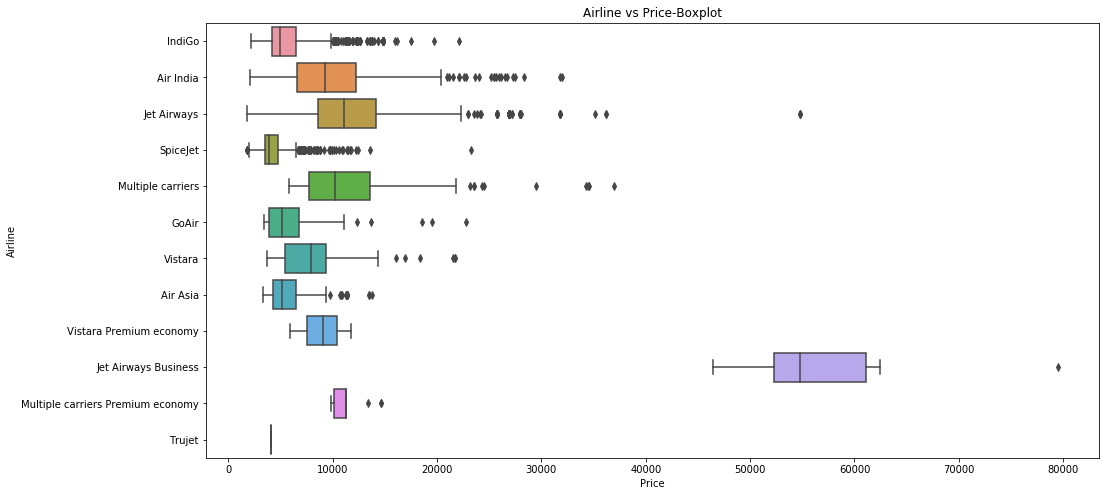

In [66]:
plt.figure(figsize=(16,8))
sns.boxplot(x="Price",y="Airline", data=df_train)
plt.title('Airline vs Price-Boxplot')

Text(0.5, 1.0, 'Source vs Price-Boxplot')

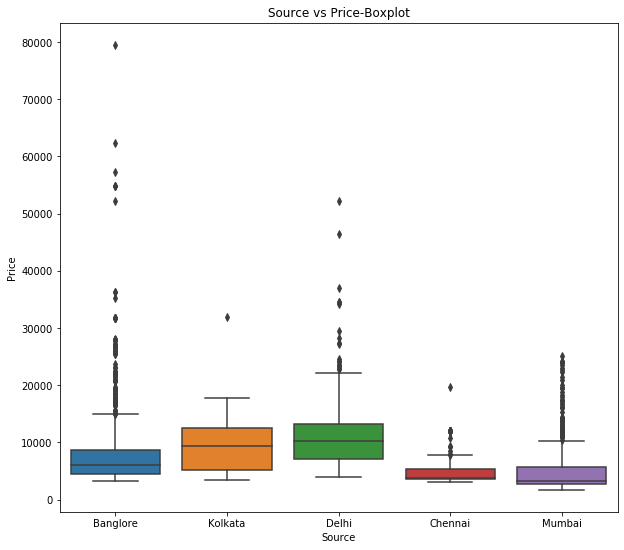

In [67]:
plt.figure(figsize=(10,9))
sns.boxplot(x="Source", y="Price",data=df_train)
plt.title('Source vs Price-Boxplot')

Text(0.5, 1.0, 'Destination vs Price-Boxplot')

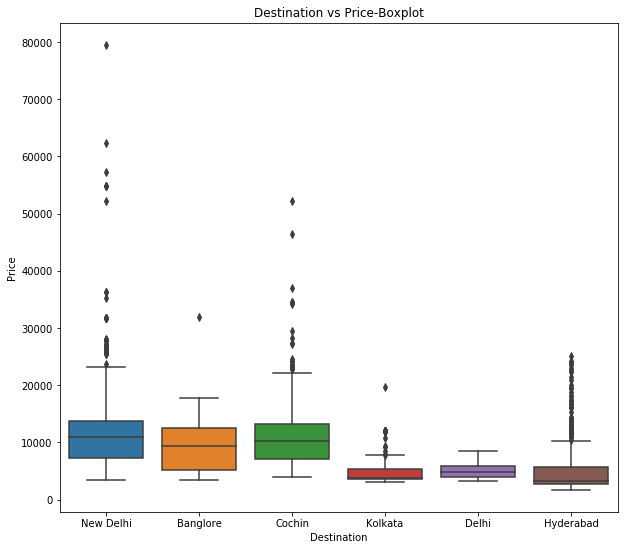

In [68]:
plt.figure(figsize=(10,9))
sns.boxplot(x="Destination", y="Price",data=df_train)
plt.title('Destination vs Price-Boxplot')

Text(0.5, 1.0, 'Total_Stops vs Price-Boxplot')

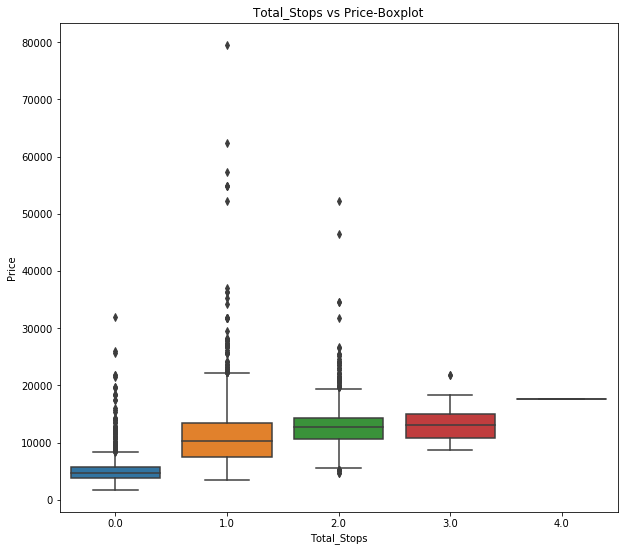

In [69]:
plt.figure(figsize=(10,9))
sns.boxplot(x="Total_Stops", y="Price",data=df_train)
plt.title('Total_Stops vs Price-Boxplot')

Text(0.5, 1.0, 'Additional_Info vs Price-Boxplot')

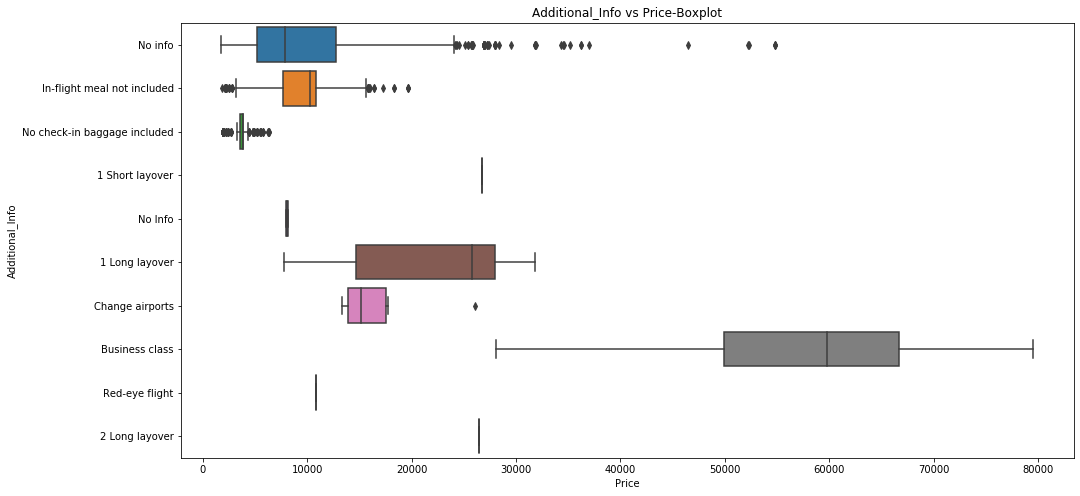

In [70]:
plt.figure(figsize=(16,8))
sns.boxplot(x="Price",y="Additional_Info", data=df_train)
plt.title('Additional_Info vs Price-Boxplot')

Text(0.5, 1.0, 'Month vs Price-Boxplot')

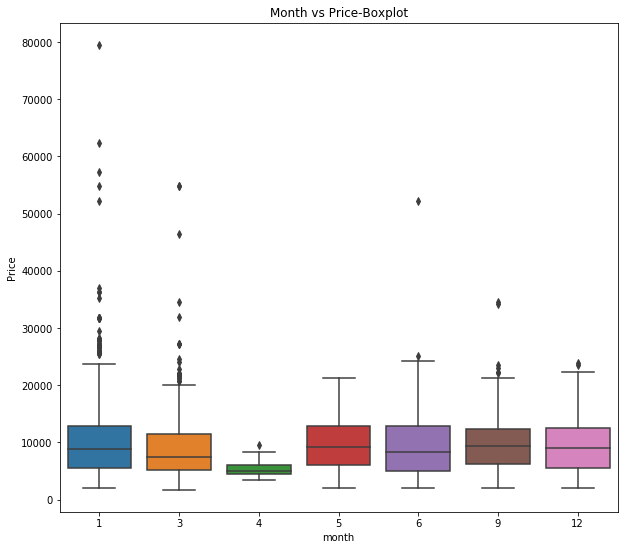

In [71]:
plt.figure(figsize=(10,9))
sns.boxplot(x="month",y="Price",data=df_train)
plt.title('Month vs Price-Boxplot')

Text(0.5, 1.0, 'Day of month vs Price-Boxplot')

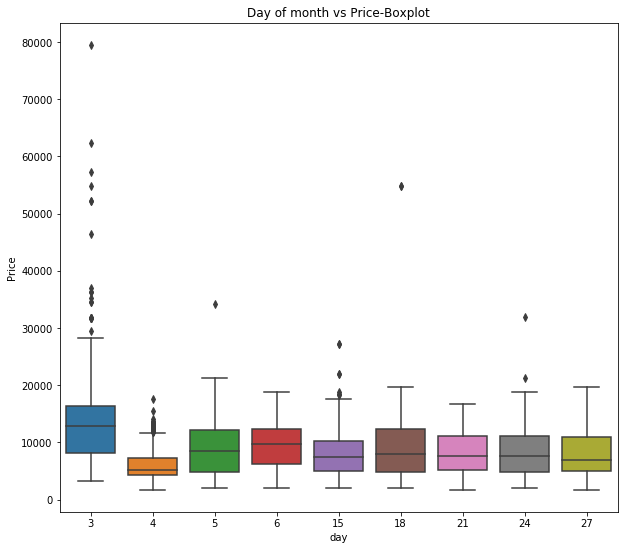

In [72]:
plt.figure(figsize=(10,9))
sns.boxplot(x="day",y="Price",data=df_train)
plt.title('Day of month vs Price-Boxplot')

Text(0.5, 1.0, 'weekday vs Price-Boxplot')

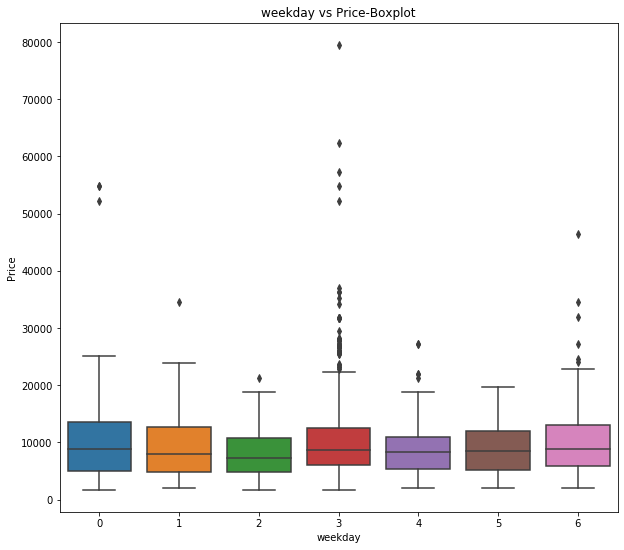

In [73]:
plt.figure(figsize=(10,9))
sns.boxplot(x="weekday",y="Price",data=df_train)
plt.title('weekday vs Price-Boxplot')

Text(0.5, 1.0, 'Dep_Hour vs Price -Boxplot')

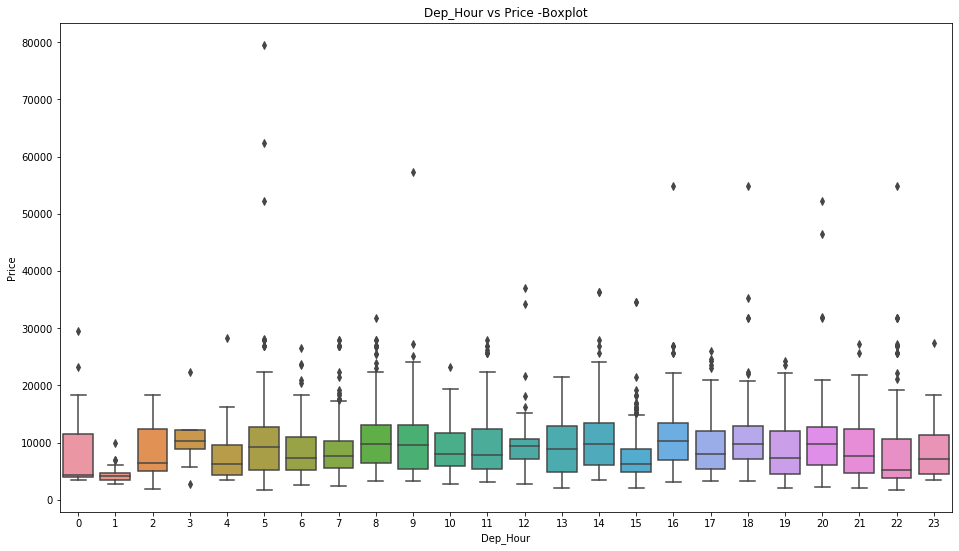

In [74]:
plt.figure(figsize=(16,9))
sns.boxplot(x="Dep_Hour",y="Price",data=df_train)
plt.title('Dep_Hour vs Price -Boxplot')

Text(0.5, 1.0, 'Duration_hours vs Price-Boxplot')

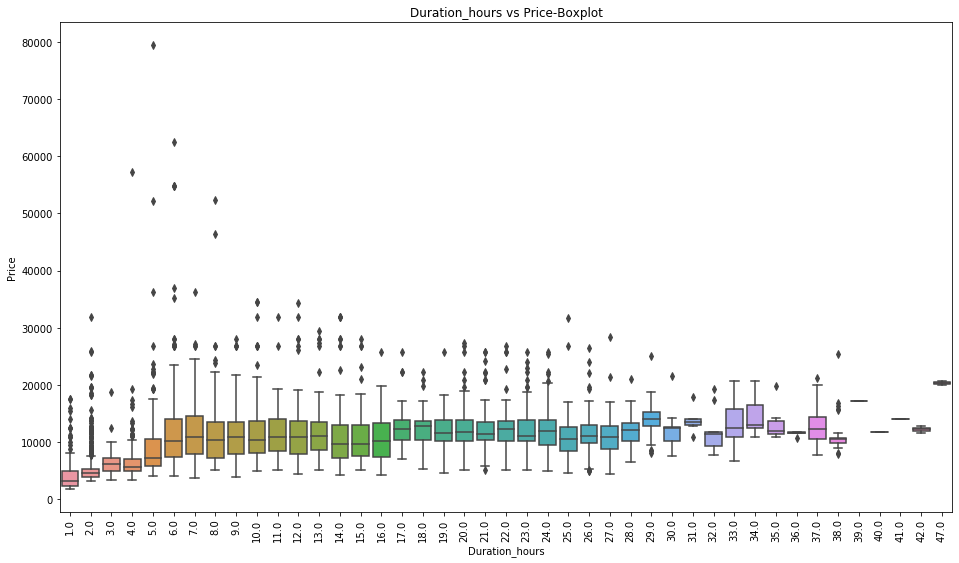

In [75]:
plt.figure(figsize=(16,9))
sns.boxplot(x="Duration_hours",y="Price",data=df_train)
plt.xticks(rotation=90)
plt.title('Duration_hours vs Price-Boxplot')

In [76]:
df.isnull().sum()

Airline               0
Source                0
Destination           0
Route                 1
Total_Stops           1
Additional_Info       0
Price              2645
training              0
month                 0
day                   0
weekday               0
Dep_Hour              0
Duration_hours        2
dtype: int64

In [77]:
df.shape

(13108, 13)

In [78]:
df.dropna(subset=["Route","Total_Stops","Duration_hours"],inplace=True)
df.shape

(13105, 13)

In [79]:
df.isnull().sum()

Airline               0
Source                0
Destination           0
Route                 0
Total_Stops           0
Additional_Info       0
Price              2644
training              0
month                 0
day                   0
weekday               0
Dep_Hour              0
Duration_hours        0
dtype: int64

In [80]:
df.skew()

Total_Stops       0.332165
Price             1.858221
training         -1.486526
month             0.622572
day               0.396560
weekday          -0.003708
Dep_Hour          0.104544
Duration_hours    0.894316
dtype: float64

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13105 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13105 non-null  object 
 1   Source           13105 non-null  object 
 2   Destination      13105 non-null  object 
 3   Route            13105 non-null  object 
 4   Total_Stops      13105 non-null  float64
 5   Additional_Info  13105 non-null  object 
 6   Price            10461 non-null  float64
 7   training         13105 non-null  int64  
 8   month            13105 non-null  int64  
 9   day              13105 non-null  int64  
 10  weekday          13105 non-null  int64  
 11  Dep_Hour         13105 non-null  int64  
 12  Duration_hours   13105 non-null  float64
dtypes: float64(3), int64(5), object(5)
memory usage: 1.4+ MB


In [82]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,training,month,day,weekday,Dep_Hour,Duration_hours
0,IndiGo,Banglore,New Delhi,BLR ? DEL,0.0,No info,3897.0,1,3,24,6,22,2.0
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2.0,No info,7662.0,1,1,5,5,5,7.0
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2.0,No info,13882.0,1,9,6,4,9,19.0
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1.0,No info,6218.0,1,12,5,3,18,5.0
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1.0,No info,13302.0,1,1,3,3,16,4.0


In [83]:
newdf = pd.get_dummies(df)
newdf

,Total_Stops,Price,training,month,day,weekday,Dep_Hour,Duration_hours,Airline_Air Asia,Airline_Air India,...,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,0.0,3897.0,1,3,24,6,22,2.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2.0,7662.0,1,1,5,5,5,7.0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,2.0,13882.0,1,9,6,4,9,19.0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1.0,6218.0,1,12,5,3,18,5.0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1.0,13302.0,1,1,3,3,16,4.0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1.0,NaN,0,6,6,3,20,23.0,0,1,...,0,0,0,0,0,0,0,0,1,0
2667,0.0,NaN,0,3,27,2,14,2.0,0,0,...,0,0,0,0,0,0,0,0,1,0
2668,1.0,NaN,0,6,3,0,21,6.0,0,0,...,0,0,0,0,0,0,0,0,1,0
2669,1.0,NaN,0,6,3,0,4,15.0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [84]:
newdf.columns

Index(['Total_Stops', 'Price', 'training', 'month', 'day', 'weekday',
       'Dep_Hour', 'Duration_hours', 'Airline_Air Asia', 'Airline_Air India',
       ...
       'Additional_Info_1 Long layover', 'Additional_Info_1 Short layover',
       'Additional_Info_2 Long layover', 'Additional_Info_Business class',
       'Additional_Info_Change airports',
       'Additional_Info_In-flight meal not included',
       'Additional_Info_No Info',
       'Additional_Info_No check-in baggage included',
       'Additional_Info_No info', 'Additional_Info_Red-eye flight'],
      dtype='object', length=173)

In [85]:
newdf.shape

(13105, 173)

In [87]:
newdf.drop(["Airline_Air Asia","Source_Banglore","Destination_Banglore","Additional_Info_No info","Route_BOM ? RPR ? VTZ ? HYD"],axis=1,inplace=True)
newdf.shape

(13105, 168)

In [88]:
train=newdf[newdf["training"]==1]
test=newdf[newdf["training"]==0]

In [89]:
train.shape

(10461, 168)

In [90]:
test.shape

(2644, 168)

In [91]:
test.head()

,Total_Stops,Price,training,month,day,weekday,Dep_Hour,Duration_hours,Airline_Air India,Airline_GoAir,...,Route_MAA ? CCU,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_Red-eye flight
0,1.0,NaN,0,6,6,3,17,10.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,NaN,0,12,5,3,6,4.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,NaN,0,5,21,1,19,23.0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1.0,NaN,0,5,21,1,8,13.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,NaN,0,6,24,0,23,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
test.drop("Price",axis=1,inplace=True)

In [93]:
test.shape

(2644, 167)

In [94]:
X=train.drop("Price", axis=1)
y=train["Price"]

In [95]:
from sklearn.preprocessing import StandardScaler
X2=StandardScaler().fit_transform(X)
X2

array([[-1.21455201,  0.        , -0.8461666 , ..., -0.01693699,
        -0.17706403, -0.00977764],
       [ 1.81343383,  0.        , -1.51387036, ..., -0.01693699,
        -0.17706403, -0.00977764],
       [ 1.81343383,  0.        ,  1.15694469, ..., -0.01693699,
        -0.17706403, -0.00977764],
       ...,
       [-1.21455201,  0.        , -0.51231472, ..., -0.01693699,
        -0.17706403, -0.00977764],
       [-1.21455201,  0.        , -1.51387036, ..., -0.01693699,
        -0.17706403, -0.00977764],
       [ 1.81343383,  0.        ,  1.15694469, ..., -0.01693699,
        -0.17706403, -0.00977764]])

In [96]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
max_r2_score=0
for r_state in range(0,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.20,random_state=r_state)
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    y_pred = lr.predict(X_test)
    r2_scr = r2_score(y_test,y_pred)
    if r2_scr>max_r2_score:
        max_r2_score = r2_scr
        final_r_state = r_state
    
print("max R2 score corresponding to random state",final_r_state,"is",max_r2_score)

max R2 score corresponding to random state 36 is 0.7494133076028276


In [97]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.20,random_state=36)

In [98]:
print(X_train.shape,"\n",X_test.shape)

(8368, 167) 
 (2093, 167)


In [100]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [101]:
LR = LinearRegression()
RR = Ridge()
LSR = Lasso()
KNR = KNeighborsRegressor()
DTC = DecisionTreeRegressor()
RFC = RandomForestRegressor()
ABC = AdaBoostRegressor()
GBC = GradientBoostingRegressor()

In [102]:
models = []
models.append(("LinearRegression", LR))
models.append(("Ridge", RR))
models.append(("Lasso", LSR))
models.append(("KNeighborsRegressor", KNR))
models.append(("DecisionTreeRegressor", DTC))
models.append(("RandomForestRegressor", RFC))
models.append(("AdaBoostRegressor", ABC))
models.append(("GradientBoostingRegressor", GBC))

In [103]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state=36, shuffle=True)

In [104]:
Model = []
score = []
cvs = []
MSE = []
MAE = []
for name,model in models:
    print("*****************",name,"******************\n")
    Model.append(name)
    model.fit(X_train,y_train)
    print(model)
    pre = model.predict(X_test)
    print("\n")
    R2 = r2_score(y_test,pre)
    print("R2 Score = ",R2)
    score.append(R2)
    print("\n")
    sc = cross_val_score(model,X,y,cv=kf,scoring="r2").mean()
    print("Cross val score = ",sc)
    cvs.append(sc)
    print("\n")
    mse = mean_squared_error(y_test,pre)
    print("Mean Squared error\n", mse)
    MSE.append(mse)
    print("\n")
    mae = mean_absolute_error(y_test,pre)
    print("Mean absolute error \n{}".format(mae))
    MAE.append(mae)
    print("\n\n")

***************** LinearRegression ******************

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


R2 Score =  0.7494133076028276


Cross val score =  -8316429014241853.0


Mean Squared error
 5476218.811375619


Mean absolute error 
1598.0981894007173



***************** Ridge ******************

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)


R2 Score =  0.7506536184938121


Cross val score =  0.7336592393265473


Mean Squared error
 5449113.565808957


Mean absolute error 
1601.2574830145109



***************** Lasso ******************

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


R2 Score =  0.7489056106400152


Cross val score =  0.7325668211589798


Mean Squared error
 5487313.812597093


Mean absolute e

In [105]:
result=pd.DataFrame({"Model": Model, "R2 Socre": score, "Cross val score": cvs, "Mean Squared Error": MSE, "Mean Absolute Error": MAE})
result

,Model,R2 Socre,Cross val score,Mean Squared Error,Mean Absolute Error
0,LinearRegression,0.749413,-8.316429e+15,5.476219e+06,1598.098189
1,Ridge,0.750654,7.336592e-01,5.449114e+06,1601.257483
2,Lasso,0.748906,7.325668e-01,5.487314e+06,1613.137409
3,KNeighborsRegressor,0.587946,6.110262e-01,9.004868e+06,1912.470807
4,DecisionTreeRegressor,0.807056,8.217194e-01,4.216521e+06,791.705049
5,RandomForestRegressor,0.837825,8.717402e-01,3.544108e+06,740.476405
6,AdaBoostRegressor,0.466590,2.571120e-01,1.165693e+07,2700.895042
7,GradientBoostingRegressor,0.841305,8.211363e-01,3.468060e+06,1260.838972


In [106]:
from sklearn.model_selection import GridSearchCV
parameters = {
              'n_estimators': [100,200,300]
             }
grid = GridSearchCV(estimator=RFC,param_grid=parameters)
grid.fit(X_train,y_train)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.n_estimators)
print(grid.best_params_)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

In [109]:
RFC = RandomForestRegressor(n_estimators=300)
RFC.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [110]:
from sklearn.externals import joblib
joblib.dump(RFC,'Flight_ticket.pkl')

['Flight_ticket.pkl']

In [111]:
test.head()

,Total_Stops,training,month,day,weekday,Dep_Hour,Duration_hours,Airline_Air India,Airline_GoAir,Airline_IndiGo,...,Route_MAA ? CCU,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_Red-eye flight
0,1.0,0,6,6,3,17,10.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,0,12,5,3,6,4.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0,5,21,1,19,23.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1.0,0,5,21,1,8,13.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0,6,24,0,23,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [112]:
model = joblib.load("Flight_Ticket.pkl")
ticket_prices = model.predict(test)

In [113]:
ticket_prices

array([14718.55      ,  4297.7       , 12898.        , ...,
       16020.23333333, 13887.46511111, 10102.87977778])

In [114]:
np.savetxt("Flight_Ticket_Price_Results.csv", ticket_prices, delimiter=",")